pip install NumPy

pip install keras

pip install keras-utils

In [24]:
#Importing the Libraries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib. pyplot as plt
import matplotlib
from sklearn.preprocessing import MinMaxScaler
from keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.dates as mandates
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K
from keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from keras.models import load_model
from keras.layers import LSTM
from tensorflow.keras.utils import plot_model

In [25]:
#reading file
df=pd.read_csv('AAPL.csv',na_values=['null'],index_col='Date',parse_dates=True,infer_datetime_format=True)
df.head()

<ipython-input-25-1ca609d19891>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df=pd.read_csv('AAPL.csv',na_values=['null'],index_col='Date',parse_dates=True,infer_datetime_format=True)


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1990-02-01,0.314732,0.334821,0.312500,0.332589,0.266423,183198400
1990-03-01,0.339286,0.339286,0.334821,0.334821,0.268211,207995200
1990-04-01,0.341518,0.345982,0.332589,0.335938,0.269106,221513600
1990-05-01,0.337054,0.341518,0.330357,0.337054,0.270000,123312000
1990-08-01,0.334821,0.339286,0.330357,0.339286,0.271788,101572800


In [28]:
#Print the shape of Dataframe  and Check for Null Values
print("Dataframe Shape: ", df. shape)
print("Null Value Present: ", df.isnull().values.any())


Dataframe Shape:  (8042, 6)
Null Value Present:  False


<Axes: xlabel='Date'>

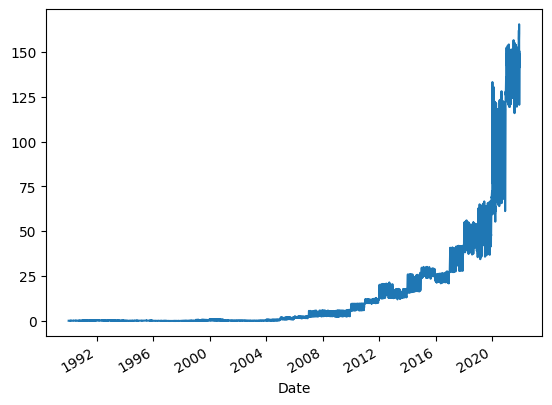

In [30]:
#Plot the True Adj Close Value
df['Adj Close'].plot()

In [31]:
#Set Target Variable
output_var = pd.DataFrame(df['Adj Close'])
#Selecting the Features
features = ['Open', 'High', 'Low', 'Volume']

In [32]:
#Scaling
scaler = MinMaxScaler()
feature_transform = scaler.fit_transform(df[features])
feature_transform= pd.DataFrame(columns=features, data=feature_transform, index=df.index)
feature_transform.head()

,Open,High,Low,Volume
Date,,,,
1990-02-01,0.001237,0.001308,0.001235,0.024369
1990-03-01,0.001388,0.001335,0.001374,0.027712
1990-04-01,0.001402,0.001375,0.001360,0.029534
1990-05-01,0.001375,0.001348,0.001346,0.016298
1990-08-01,0.001361,0.001335,0.001346,0.013367


In [33]:
#Splitting to Training set and Test set
timesplit= TimeSeriesSplit(n_splits=10)
for train_index, test_index in timesplit.split(feature_transform):
        X_train, X_test = feature_transform[:len(train_index)], feature_transform[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = output_var[:len(train_index)].values.ravel(), output_var[len(train_index): (len(train_index)+len(test_index))].values.ravel()

In [34]:
#Process the data for LSTM
trainX =np.array(X_train)
testX =np.array(X_test)
X_train = trainX.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = testX.reshape(X_test.shape[0], 1, X_test.shape[1])

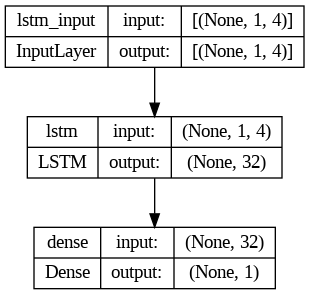

In [36]:
#Building the LSTM Model
lstm = Sequential()
lstm.add(LSTM(32, input_shape=(1, trainX.shape[1]), activation='relu', return_sequences=False))
lstm.add(Dense(1))
lstm.compile(loss='mean_squared_error', optimizer='adam')
plot_model(lstm, show_shapes=True, show_layer_names=True)

In [37]:
#Model Training
history=lstm.fit(X_train, y_train, epochs=100, batch_size=8, verbose=1, shuffle=False)

Epoch 1/100
914/914 [==============================] - 4s 2ms/step - loss: 3.3218
Epoch 2/100
914/914 [==============================] - 2s 2ms/step - loss: 37.9151
Epoch 3/100
914/914 [==============================] - 2s 2ms/step - loss: 14.2248
Epoch 4/100
914/914 [==============================] - 2s 2ms/step - loss: 3.5699
Epoch 5/100
914/914 [==============================] - 2s 2ms/step - loss: 0.8212
Epoch 6/100
914/914 [==============================] - 3s 3ms/step - loss: 0.2987
Epoch 7/100
914/914 [==============================] - 2s 2ms/step - loss: 0.1703
Epoch 8/100
914/914 [==============================] - 2s 2ms/step - loss: 0.1210
Epoch 9/100
914/914 [==============================] - 2s 2ms/step - loss: 0.0949
Epoch 10/100
914/914 [==============================] - 2s 2ms/step - loss: 0.0790
Epoch 11/100
914/914 [==============================] - 2s 2ms/step - loss: 0.0697
Epoch 12/100
914/914 [==============================] - 2s 3ms/step - loss: 0.0642
Epoch 13/10

In [38]:
#LSTM Prediction
y_pred= lstm.predict(X_test)

23/23 [==============================] - 0s 3ms/step


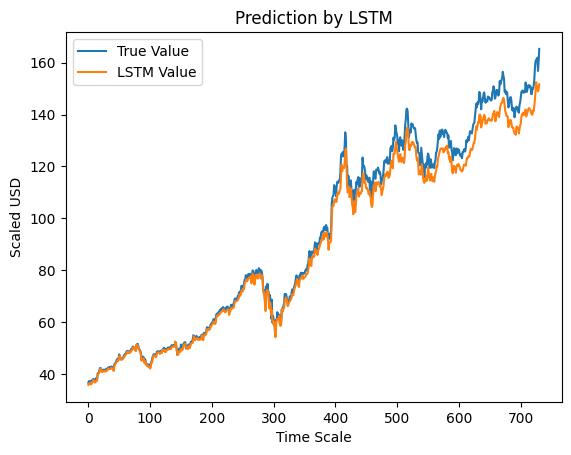

In [40]:
#Predicted vs True Adj Close Value – LSTM
plt.plot(y_test, label='True Value')
plt.plot(y_pred, label='LSTM Value')
plt.title("Prediction by LSTM")
plt.xlabel('Time Scale')
plt.ylabel('Scaled USD')
plt.legend()
plt.show()